# **Data Understanding**

Disini saya menggunakan dataset mall_customers yang saya dapatkan dari kaggle, saya upload ke PostgreSQL di Aiven dengan code dibawah ini

In [1]:
pip install sqlalchemy psycopg2



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sqlalchemy import create_engine

# 1. Load dataset
df = pd.read_csv("mall_customers.csv")

# 2. Sesuaikan nama kolom agar enak dipakai di PostgreSQL
df = df.rename(columns={
    "CustomerID": "customer_id",
    "Gender": "gender",
    "Age": "age",
    "Annual Income (k$)": "annual_income",
    "Spending Score (1-100)": "spending_score"
})

# 3. Koneksi ke PostgreSQL Aiven
host = "pg-11b8ab1b-iris-postgresql.g.aivencloud.com"
port = "26551"
dbname = "defaultdb"
user = "avnadmin"
password = "AVNS_yWkCpDUtO3Q12rJAkIx"

engine = create_engine(f"postgresql://{user}:{password}@{host}:{port}/{dbname}")

# 4. Upload dataset ke tabel "customers"
df.to_sql("customers", engine, if_exists="replace", index=False)

print("✅ Dataset Mall Customers berhasil diupload ke PostgreSQL Aiven!")


✅ Dataset Mall Customers berhasil diupload ke PostgreSQL Aiven!


Lalu get data di Power BI dengan Python script untuk mengambil database dari PostgreSQL di Aiven

## **Ekesplorasi Data**

### **1. Mengetahui tipe data di Power BI**
Ditampilan awal masuk ke Tranform Data di bar menu diatas, lalu akan menampilkan seperti dengan tipe data yang tercantum dalam tiap kolom

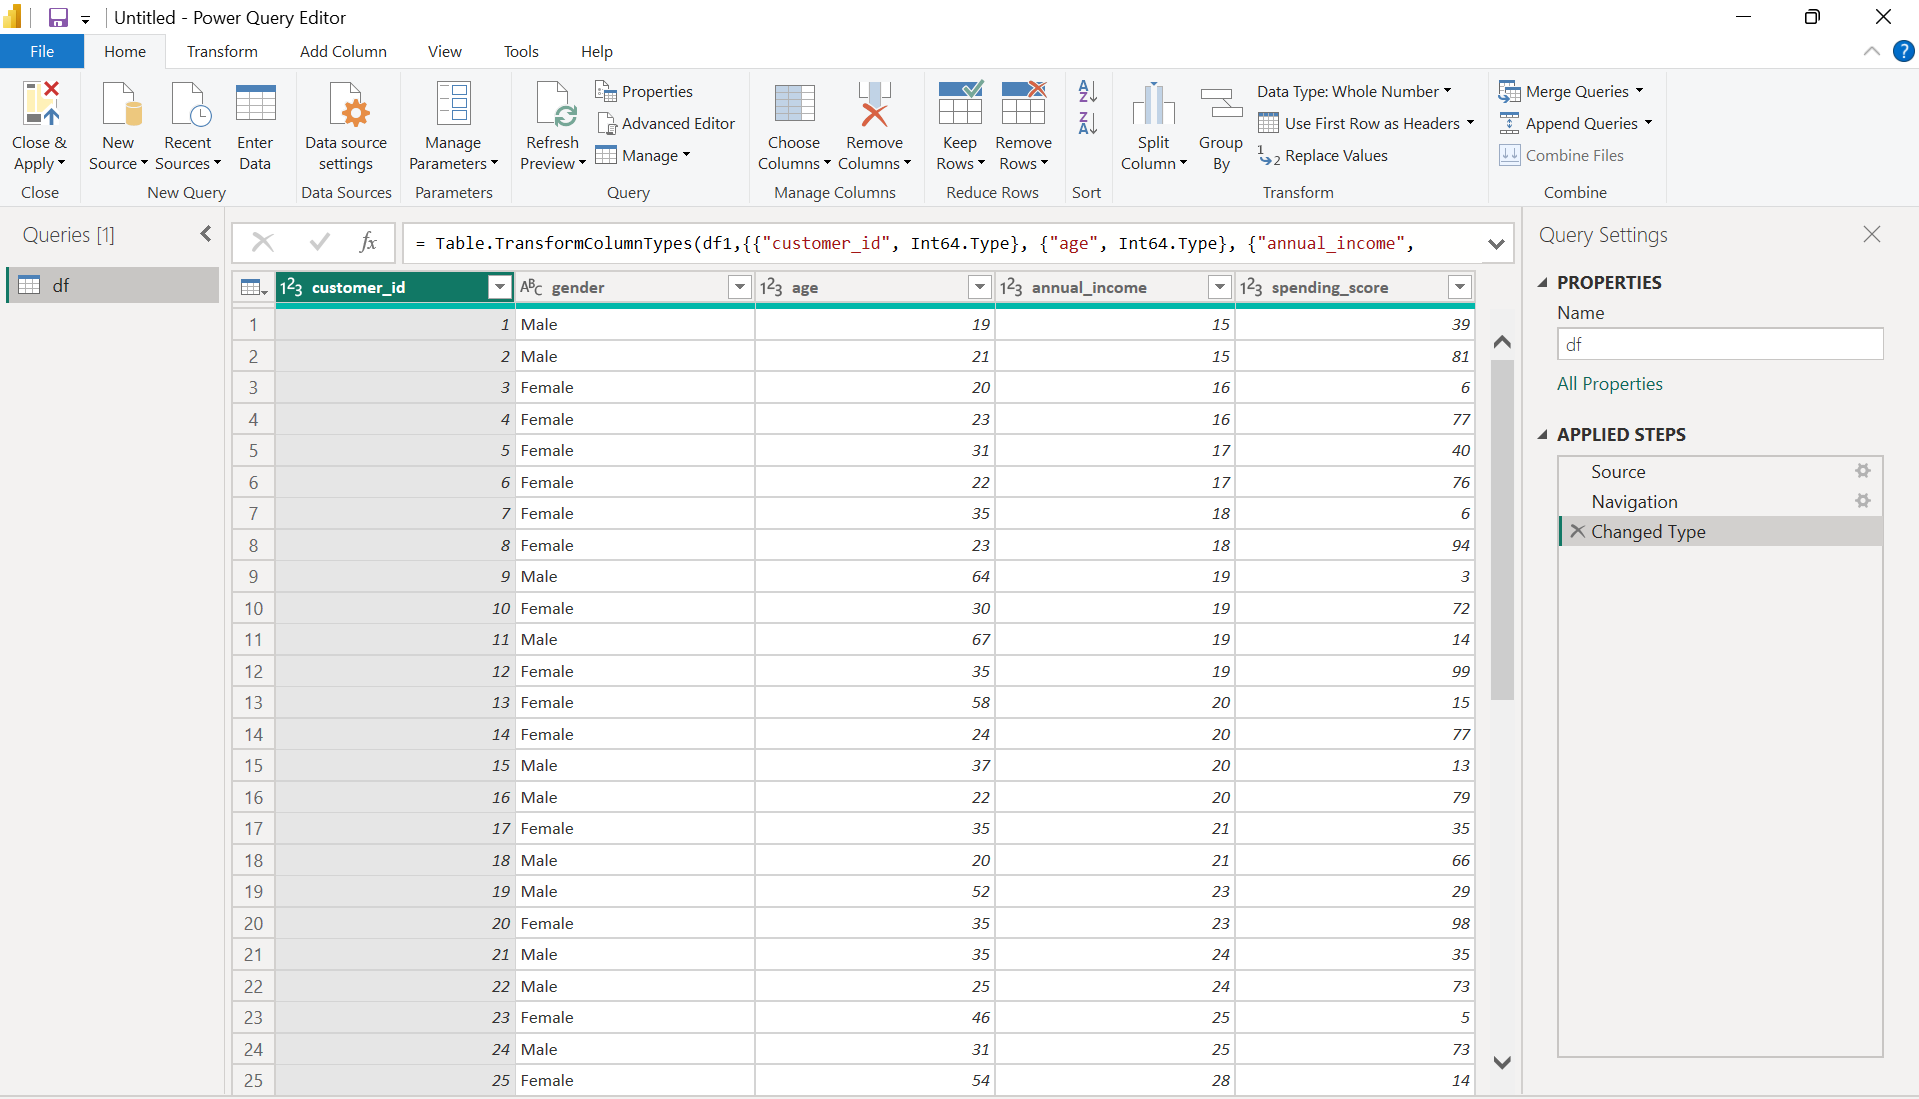

### **2. Kualitas Data**

#### **Melihat Outlier**
Menggunakan Python Visual di Power BI langsung lalu centang field ke Pyhton Visual, dan masukkan code seperti digambar, yaitu melihat data dengan boxplot

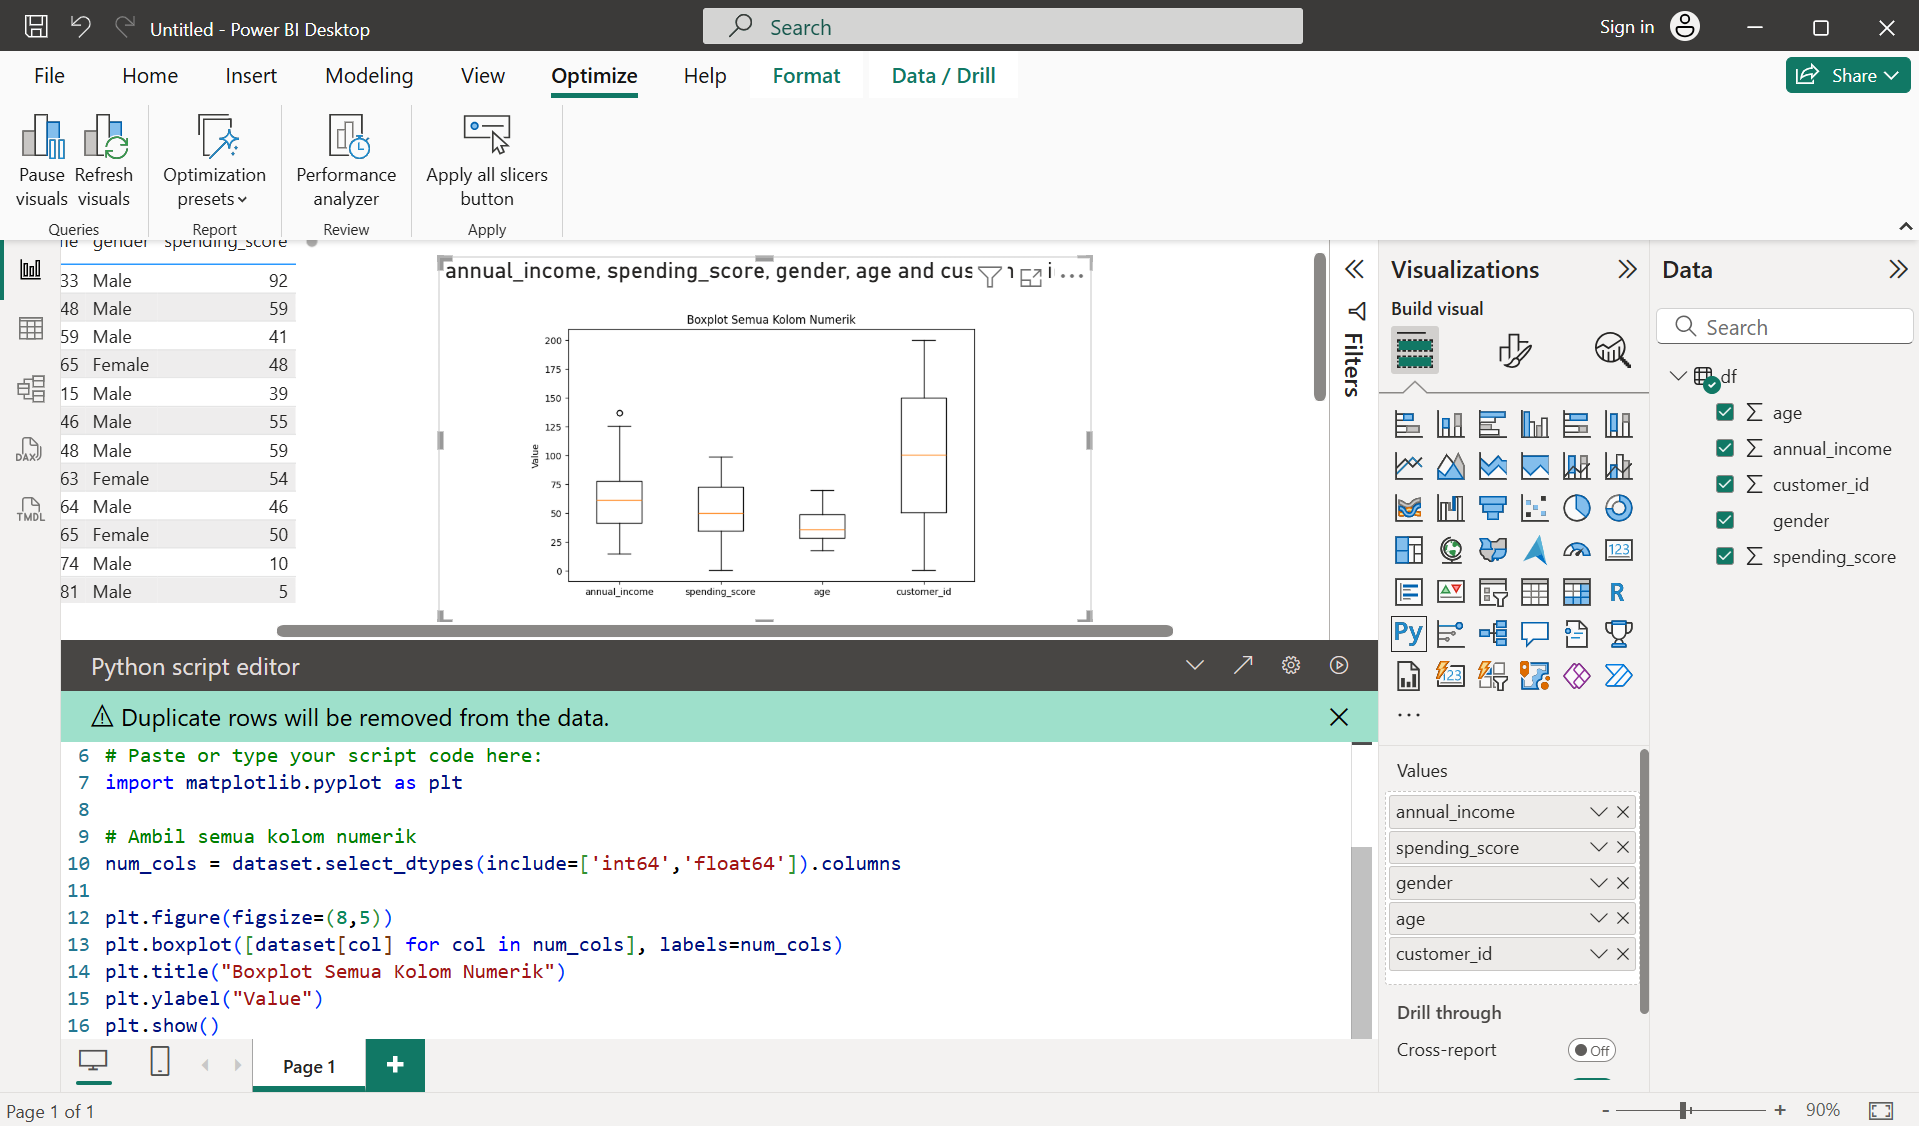

#### **Konsistensi Data**
Pada tool transform data dan pada bar view kita bisa melihat Column quality, Coloumn distribution, dll.

Disini kita bisa melihat Umur minimal dan maksimal yang masuk akal tidak ada data yang aneh, dan digender hanya terdapat 2 Chart yaitu male dan female

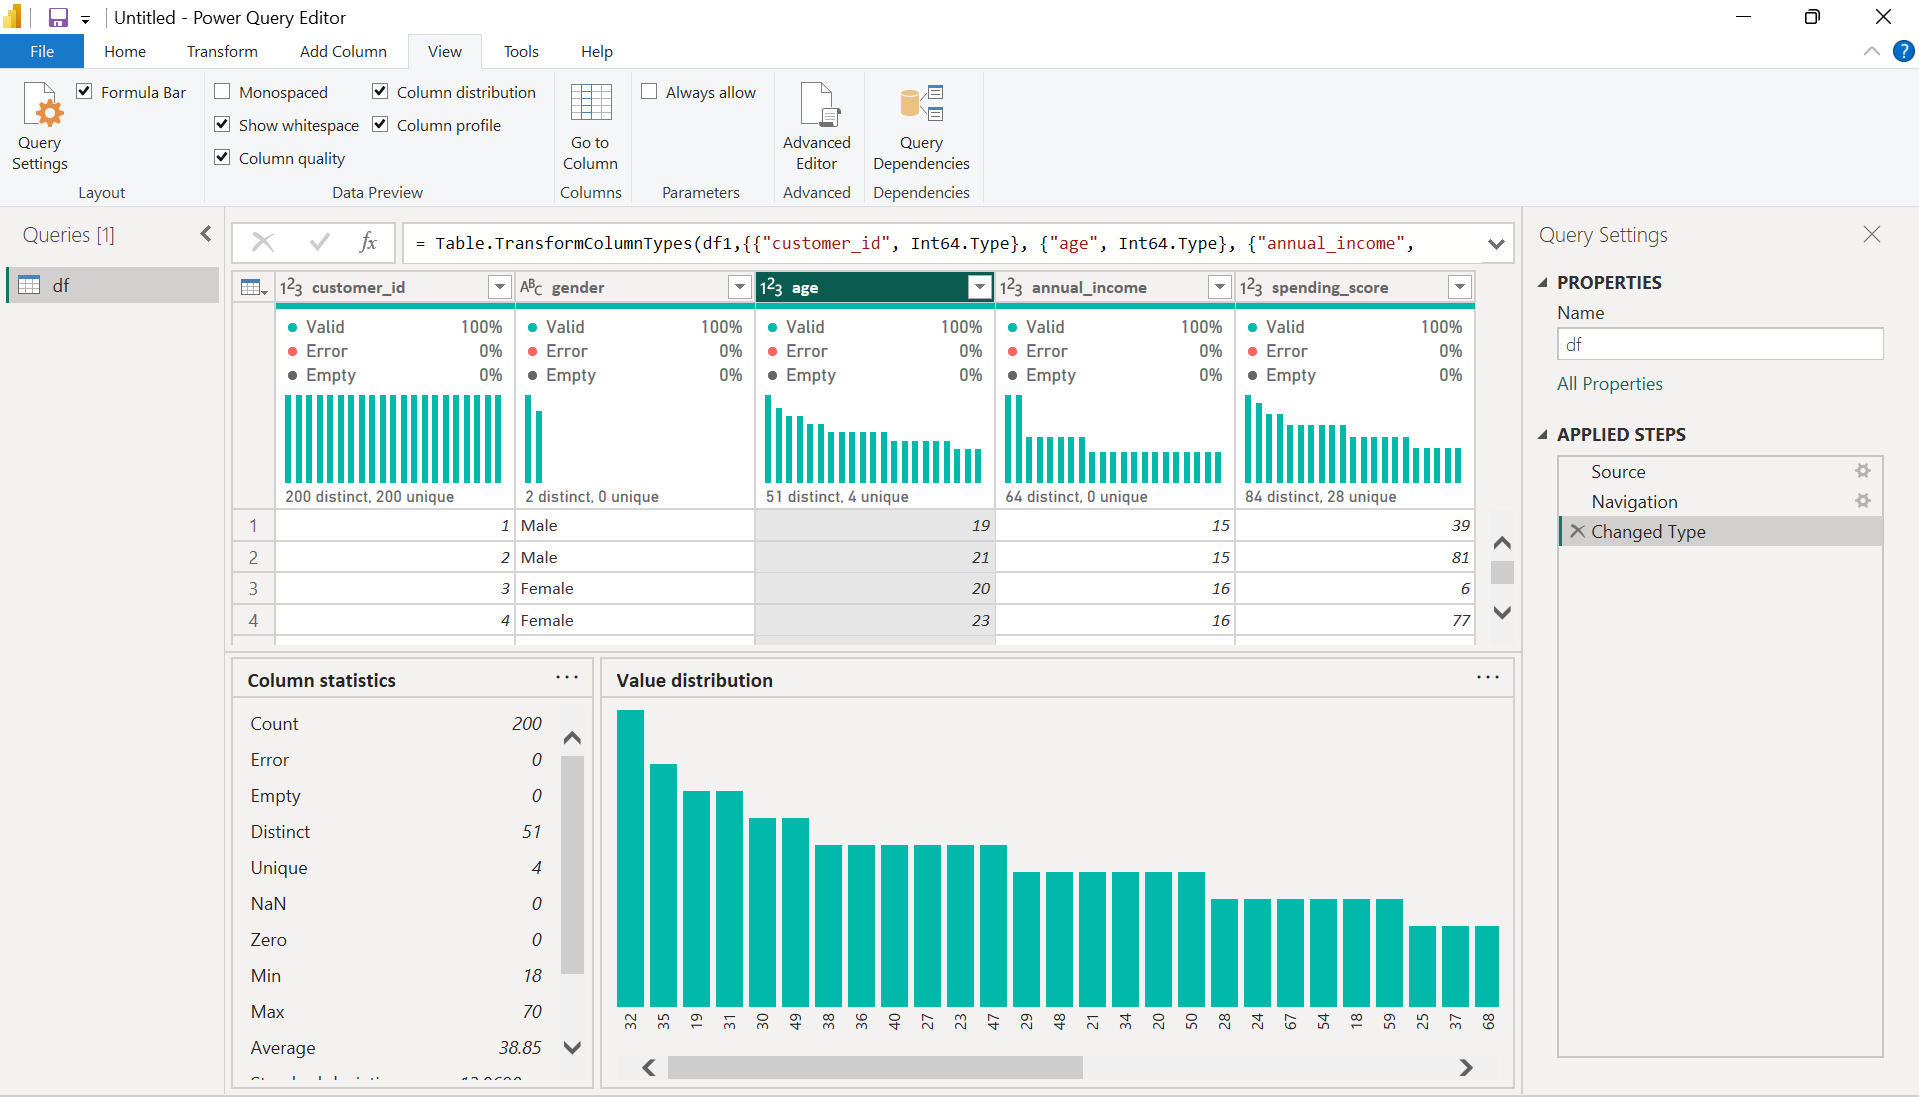

#### **Missing Values**
Gambar diatas juga menunjukkan ada atau tidak nya Missing Values

- ✅ Valid

- ⚠️ Error

- ⭕ Empty

Kalau semua 100% valid, berarti tidak ada missing values.